Анализ вакансий от Алексея Манина

In [85]:
import pandas as pd
import datetime
import re
from dateutil.parser import parse
import glob

In [86]:
# df = pd.read_csv(r'2_88__дата_маркетинг_10_156_150_164_163_157_134_name_description.csv', sep=';', encoding='utf-8')
# df.head(2)

files_lst = glob.glob('*.csv')

df = pd.DataFrame()
for f in files_lst:
    tmp_df = pd.read_csv(f, sep=';', encoding='utf-8')
    df = pd.concat([df, tmp_df], axis=0)

# Удаляем дублирующиеся строки
df = df.drop_duplicates()
df.shape


(2956, 10)

Преобразование даты __date__ в формат `datetime` в новую колонку __date_cr__

In [87]:
# Преобразование даты date в формат datetime в новую колонку date_cr
month_numbers = {'января': '01', 'февраля': '02', 'марта': '03', 'апреля': '04', 'мая': '05', 'июня': '06', 'июля': '07',
                 'августа': '08', 'сентября': '09', 'октября': '10', 'ноября': '11', 'декабря': '12'}

def month_replace(line):
    for k, v in month_numbers.items():
        line = line.replace(k, v)
    return line

df = df.dropna(subset=['date'])
df['date_cr'] = df['date'].apply(lambda x: re.findall('опубликована (.*?) в', x)[0].replace("\xa0", " ").strip())
df['date_cr'] = df['date_cr'].apply(lambda x: datetime.datetime.strptime(month_replace(x), '%d %m %Y'))
df['date_cr'] = df.date_cr.dt.date
df

,id,date,name,company,salary,experience,schedule,schedule_dop,key,description,date_cr
0,95893488,Вакансия опубликована 28 мая 2024 в Москве,Аналитик данных (Ozon Global),Ozon Офис и Коммерция,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['SQL', 'Python', 'Маркетплейс', 'Торговая пло...",Мы команда качества клиентского сервиса кроссб...,2024-05-28
1,90991645,Вакансия опубликована 8 мая 2024 в Москве,Веб-аналитик,Четыре Лапы,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,[],Обязанности: Автоматизация аналитических от...,2024-05-08
2,100220263,Вакансия опубликована 1 июня 2024 в Москве,Аналитик 1С,Инагро,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,[],"Торгово-производственная Компания, один из лид...",2024-06-01
3,99710345,Вакансия опубликована 23 мая 2024 в Москве,Аналитик SQL,"ПАО ВТБ, Розничный бизнес",NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['SQL', 'MS Excel']","Обязанности: подведение итогов Промо-акций, р...",2024-05-23
4,100364222,Вакансия опубликована 27 мая 2024 в Москве,Бизнес-аналитик мобильного приложения сотрудника,«Азбука вкуса». Офис,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['Agile Project Management', 'SQL', 'iOS', 'An...",Мы — айтишная субкультура в лучшей сети суперм...,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...
517,98449413,Вакансия опубликована 6 мая 2024 в Санкт-Петер...,Аналитик 1С:ЗУП,АО ЗАСЛОН,от 150 000 ₽ на руки,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['Разработка технических заданий', 'Разработка...","АО ЗАСЛОН - научно-технический центр, который ...",2024-05-06
518,98634508,Вакансия опубликована 8 мая 2024 в Санкт-Петер...,Администратор Primavera,"ТИТАН-2, холдинг",NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,[],Крупный строительный Холдинг Титан-2 приглашае...,2024-05-08
519,100329138,Вакансия опубликована 27 мая 2024 в Санкт-Пете...,SEO-специалист / SEO-оптимизатор,Интернет-агентство ARTRIX,от 75 000 ₽ на руки,Требуемый опыт работы: 1–3 года,"Полная занятость, удаленная работа","Возможно временное оформление: договор услуг, ...","['SEO', 'Яндекс.Метрика', 'WEB аналитика', 'Пр...","Привет! Я Владислав, руководитель отдела онлай...",2024-05-27
520,99571583,Вакансия опубликована 20 мая 2024 в Санкт-Пете...,Аналитик данных (Excel),ПАО Ростелеком,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, удаленная работа",NaN,[],Обязанности: проведение анализа большого объе...,2024-05-20


Преобразование ключевых навыков __key__ в словарь с навыками в тойже колонке

In [88]:
# Преобразование ключевых навыков key в словарь с навыками в тойже колонке
def str_to_lst(text):
    if text != '[]':
        text = text.strip("[]")  # Удаляем скобки "[" и "]" из строки

        # Разделяем строку по запятым и удаляем лишние пробелы
        list_of_strings = text.split(",")
        list_of_strings = [s.replace('\xa0', ' ').strip() for s in list_of_strings]
        return list_of_strings
    else:
        return []

df['key'] = df.key.apply(lambda x: str_to_lst(x))
df.head(2)

,id,date,name,company,salary,experience,schedule,schedule_dop,key,description,date_cr
0,95893488,Вакансия опубликована 28 мая 2024 в Москве,Аналитик данных (Ozon Global),Ozon Офис и Коммерция,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,"['SQL', 'Python', 'Маркетплейс', 'Торговая пло...",Мы команда качества клиентского сервиса кроссб...,2024-05-28
1,90991645,Вакансия опубликована 8 мая 2024 в Москве,Веб-аналитик,Четыре Лапы,NaN,Требуемый опыт работы: 1–3 года,"Полная занятость, полный день",NaN,[],Обязанности: Автоматизация аналитических от...,2024-05-08


Исследование ключевых навыков

In [89]:
# Создаем пустой словарь
key_dic = {}

# Перебираем списки из колонки key
for key_lst in df.key:
    # Перебираем элементы списка
    for item in key_lst:
        # Если элемент уже есть в словаре, увеличиваем его значение на 1
        if item in key_dic:
            key_dic[item] += 1
        # Если элемента нет в словаре, добавляем его как ключ со значением 1
        else:
            key_dic[item] = 1

# df_key = pd.DataFrame(columns=['count'])
# df_key = pd.DataFrame.from_dict(key_dic)
df_key = pd.DataFrame([key_dic]).T.sort_values(by=0, ascending=False).reset_index().rename(columns={0: 'count', 'index': 'key_skills'})
# df_key.head(30)

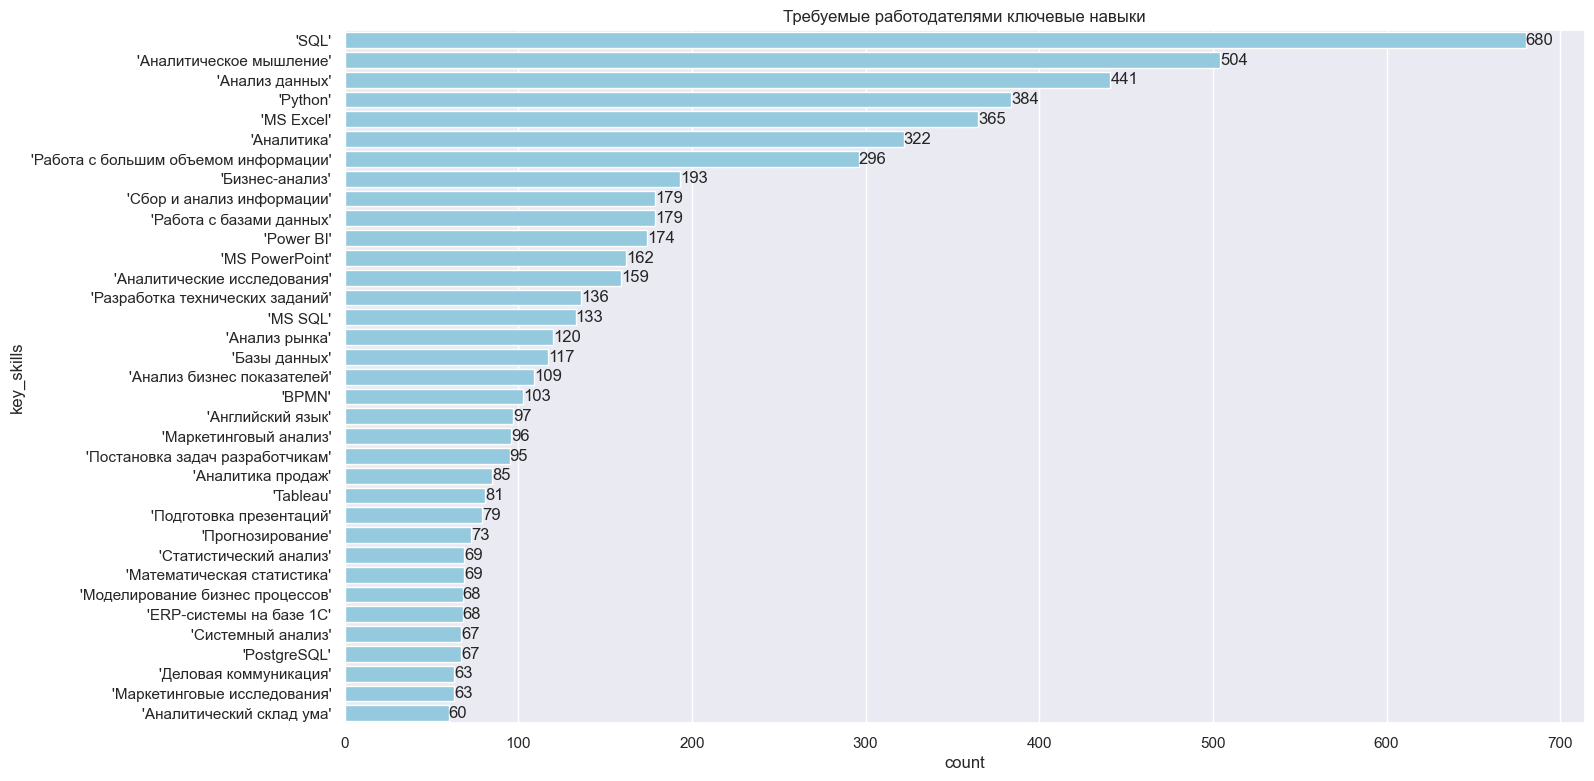

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(16,9)})

# Создаем горизонтальный график столбцов с помощью Seaborn
sns.barplot(x='count', y='key_skills', data=df_key.head(35), color='skyblue')

# Добавляем значения на столбцах
for index, value in enumerate(df_key['count'].head(35)):
    plt.text(value, index, str(value), ha='left', va='center')

# Настройка заголовка графика
plt.title('Требуемые работодателями ключевые навыки')

# Отображение графика
plt.show()

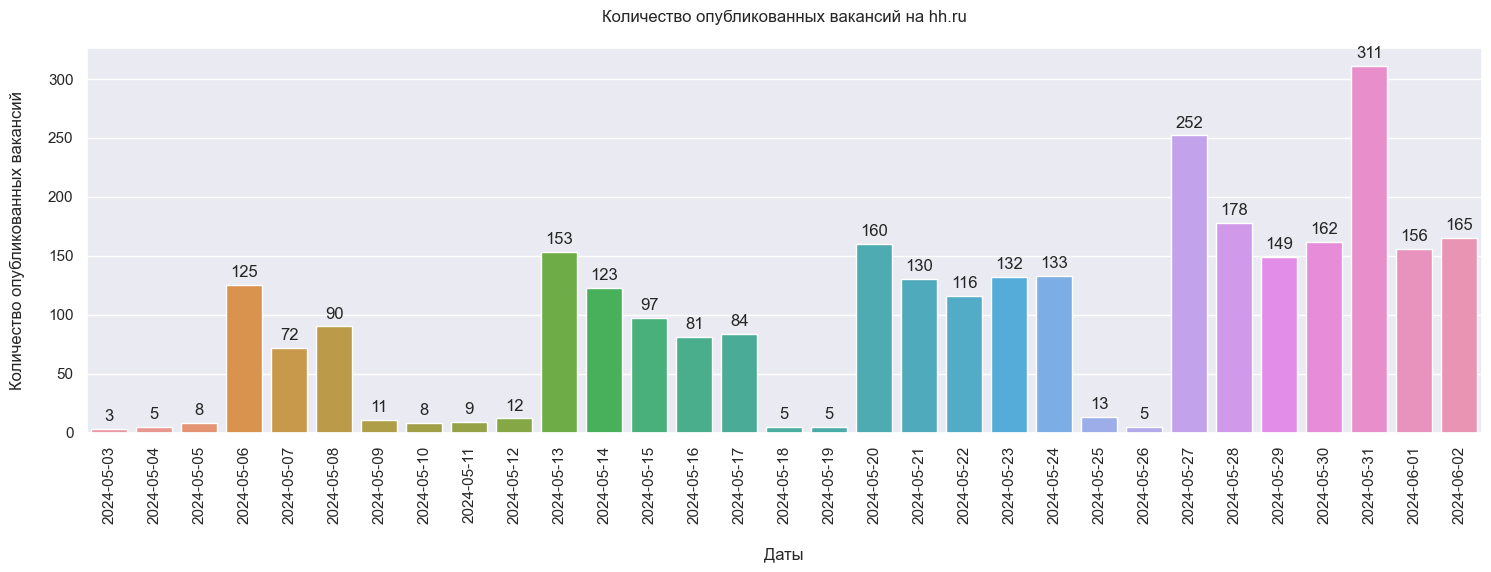

In [91]:

df_1 = df.groupby(['date_cr'], as_index=False) \
         .agg({'id': 'count'}) \
         .rename(columns={'id': 'count_create'}) \
         .sort_values(['date_cr'], ascending=True)

sns.set_theme(rc={'figure.figsize':(18,5)})
ax = sns.barplot(data=df_1, y='count_create', x='date_cr')
ax.set_xticklabels(df_1.date_cr, rotation=90)
ax.set_title('Количество опубликованных вакансий на hh.ru\n')
ax.set_ylabel('Количество опубликованных вакансий\n')
ax.set_xlabel('\nДаты')

# Добавляем значения к столбцам
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()